In [ ]:
! pip install 'scanpy[leiden]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval
import pooch

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [ ]:
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EXAMPLE_DATA.load_registry_from_doi()

In [ ]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

## AnnData Object Format

<table style="width:100%; border-collapse: separate; border-spacing: 0;">
  <thead>
    <tr>
      <th style="text-align: left; padding: 10px;">Slot</th>
      <th style="text-align: left; padding: 10px;">What it stores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 10px 10px 20px 10px;"><code>.X</code></td>
      <td style="padding: 10px 10px 20px 10px;">Main data matrix (e.g., gene or peak counts)</td>
    </tr>
    <tr>
      <td style="padding: 10px 10px 20px 10px;"><code>.obs</code></td>
      <td style="padding: 10px 10px 20px 10px;">Cell metadata (e.g., cell type, sample ID)</td>
    </tr>
    <tr>
      <td style="padding: 10px 10px 20px 10px;"><code>.var</code></td>
      <td style="padding: 10px 10px 20px 10px;">Gene/peak info (e.g., gene names, chromosomes)</td>
    </tr>
    <tr>
      <td style="padding: 10px 10px 20px 10px;"><code>.obsm</code></td>
      <td style="padding: 10px 10px 20px 10px;">Dimensionality reduction (e.g., PCA, UMAP coordinates)</td>
    </tr>
    <tr>
      <td style="padding: 10px 10px 10px 10px;"><code>.uns</code></td>
      <td style="padding: 10px 10px 10px 10px;">Unstructured data (e.g., legends, colors, settings)</td>
    </tr>
  </tbody>
</table>


In [ ]:
adata.X.shape

(17125, 36601)

In [ ]:
## adata.X to pd dataframe
import pandas as pd

df = pd.DataFrame(
    adata.X.toarray(),          # convert sparse matrix to dense
    index=adata.obs_names,      # cell IDs as row labels
    columns=adata.var_names     # gene or peak names as column labels
)

In [ ]:
df.head()   # show first 5 rows

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACCCAAGGATGGCT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAAGGCCTAGA-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAAGTGAGTGC-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACAAGAGGCT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACATCGTGGC-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACCCAAGGATGGCT-1         0.0         0.0         0.0         0.0   
AAACCCAAGGCCTAGA-1         0.0         0.0         0.0         0.0   
AAACCCAAGTGAGTGC-1         0.0         0.0         0.0         0.0   
AAACCCACAAGAGGCT-1         0.0         0.0         0.0         0.0   
AAACCCACATCGTGGC-1         0.0         0.0         0.0         0.0   

                    AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACCCAAGGATGGCT-1         0.0  ...         0.0         0.0         0.0   
AAACCCAAGGCCTAGA-1         0.0  ...         0.0         0.0         0.0   
AAACCCAAGTGAGTGC-1         0.0  ...         0.0         0.0         0.0   
AAACCCACAAGAGGCT-1         0.0  ...         0.0         0.0         0.0   
AAACCCACATCGTGGC-1         0.0  ...         0.0         0.0         0.0   

                    AC136616.3  AC136616.2  AC141272.1  AC023491.2  \
AAACCCAAGGATGGCT-1         0.0         0.0         0.0         0.0   
AAACCCAAGGCCTAGA-1         0.0         0.0         0.0         0.0   
AAACCCAAGTGAGTGC-1         0.0         0.0         0.0         0.0   
AAACCCACAAGAGGCT-1         0.0         0.0         0.0         0.0   
AAACCCACATCGTGGC-1         0.0         0.0         0.0         0.0   

                    AC007325.1  AC007325.4  AC007325.2  
AAACCCAAGGATGGCT-1         0.0         0.0         0.0  
AAACCCAAGGCCTAGA-1         0.0         0.0         0.0  
AAACCCAAGTGAGTGC-1         0.0         0.0         0.0  
AAACCCACAAGAGGCT-1         0.0         0.0         0.0  
AAACCCACATCGTGGC-1         0.0         0.0         0.0  

[5 rows x 36601 columns]

In [ ]:
adata.obs

sample
AAACCCAAGGATGGCT-1   s1d1
AAACCCAAGGCCTAGA-1   s1d1
AAACCCAAGTGAGTGC-1   s1d1
AAACCCACAAGAGGCT-1   s1d1
AAACCCACATCGTGGC-1   s1d1
...                   ...
TTTGTTGAGAGTCTGG-1   s1d3
TTTGTTGCAGACAATA-1   s1d3
TTTGTTGCATGTTACG-1   s1d3
TTTGTTGGTAGTCACT-1   s1d3
TTTGTTGTCGCGCTGA-1   s1d3

[17125 rows x 1 columns]

In [ ]:
adata.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.5, AL627309.4, AP006222.2, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, AL645608.4, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, AL645608.5, AL645608.8, RNF223, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, ...]

[36601 rows x 0 columns]

In [ ]:
adata.obsm

AxisArrays with keys: 

In [ ]:
adata.uns

OrderedDict()

## Quality Control

🧪 Why is QC important?

Single-cell experiments often capture:

- ❌ Low-quality cells (dead or dying)
- ❌ Doublets (two cells captured as one)
- ❌ Empty droplets
- ❌ Technical noise

QC helps you **filter out this noise**, so you’re only working with **high-quality, individual cells** that truly represent the biological system you're studying.


🎯 Goal:

After **Quality Control (QC)**, you're left with:

- ✅ Cells that are **real, healthy, and representative**
- ✅ Data that’s **clean enough to proceed with**:
  - Normalization  
  - PCA  
  - Clustering  
  - UMAP  
  - Differential expression  
  - and more...

In [ ]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [ ]:
adata.var

mt   ribo     hb
MIR1302-2HG  False  False  False
FAM138A      False  False  False
OR4F5        False  False  False
AL627309.1   False  False  False
AL627309.3   False  False  False
...            ...    ...    ...
AC141272.1   False  False  False
AC023491.2   False  False  False
AC007325.1   False  False  False
AC007325.4   False  False  False
AC007325.2   False  False  False

[36601 rows x 3 columns]

In [ ]:
counts_mt = adata.var['mt'].value_counts()
counts_ribo = adata.var['ribo'].value_counts()
counts_hb = adata.var['hb'].value_counts()

In [ ]:
print(counts_mt)
print(counts_ribo)
print(counts_hb)

mt
False    36588
True        13
Name: count, dtype: int64
ribo
False    36498
True       103
Name: count, dtype: int64
hb
False    36589
True        12
Name: count, dtype: int64


In [ ]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [ ]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGGATGGCT-1            460.0               6.133398       5.309938   
AAACCCAAGGCCTAGA-1           1790.0               7.490530      13.926710   
AAACCCAAGTGAGTGC-1            581.0               6.366470      35.622318   
AAACCCACAAGAGGCT-1            780.0               6.660575       4.496973   
AAACCCACATCGTGGC-1            159.0               5.075174      28.648647   
...                             ...                    ...            ...   
TTTGTTGAGAGTCTGG-1  

In [ ]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGGATGGCT-1            460.0               6.133398       5.309938   
AAACCCAAGGCCTAGA-1           1790.0               7.490530      13.926710   
AAACCCAAGTGAGTGC-1            581.0               6.366470      35.622318   
AAACCCACAAGAGGCT-1            780.0               6.660575       4.496973   
AAACCCACATCGTGGC-1            159.0               5.075174      28.648647   
...                             ...                    ...            ...   
TTTGTTGAGAGTCTGG-1  

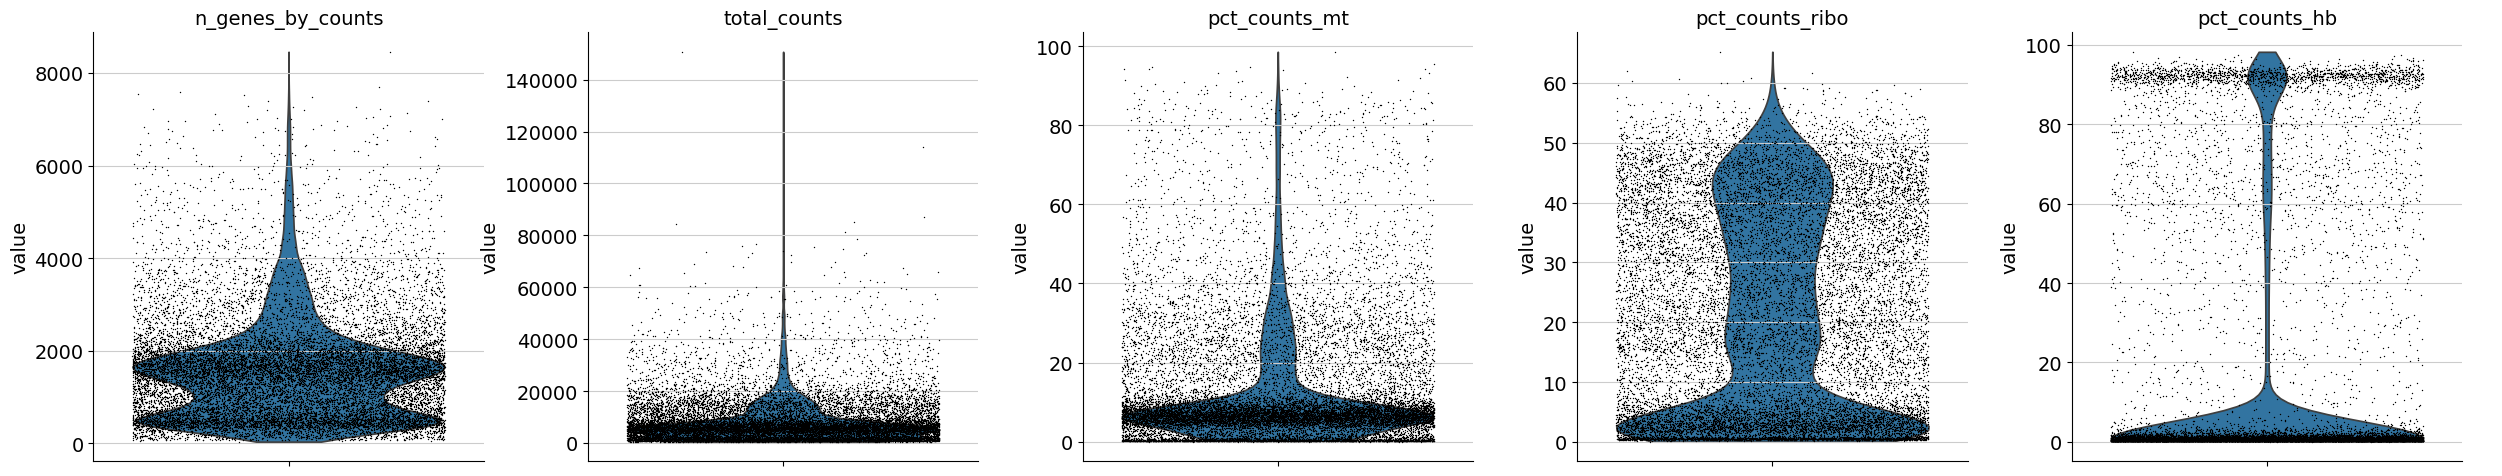

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt","pct_counts_ribo","pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
)

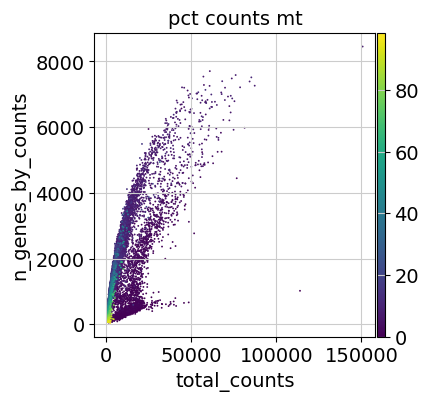

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

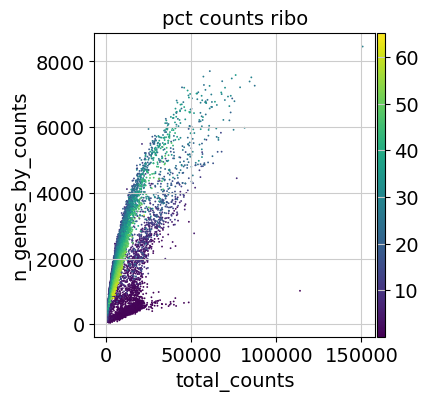

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")

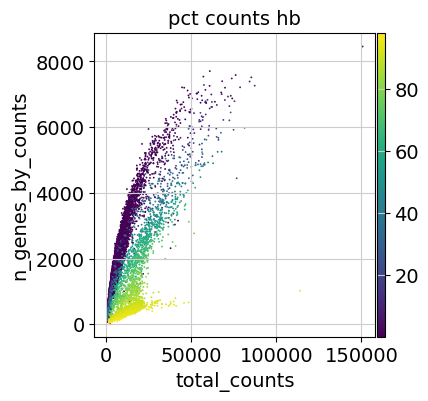

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_hb")

In [ ]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

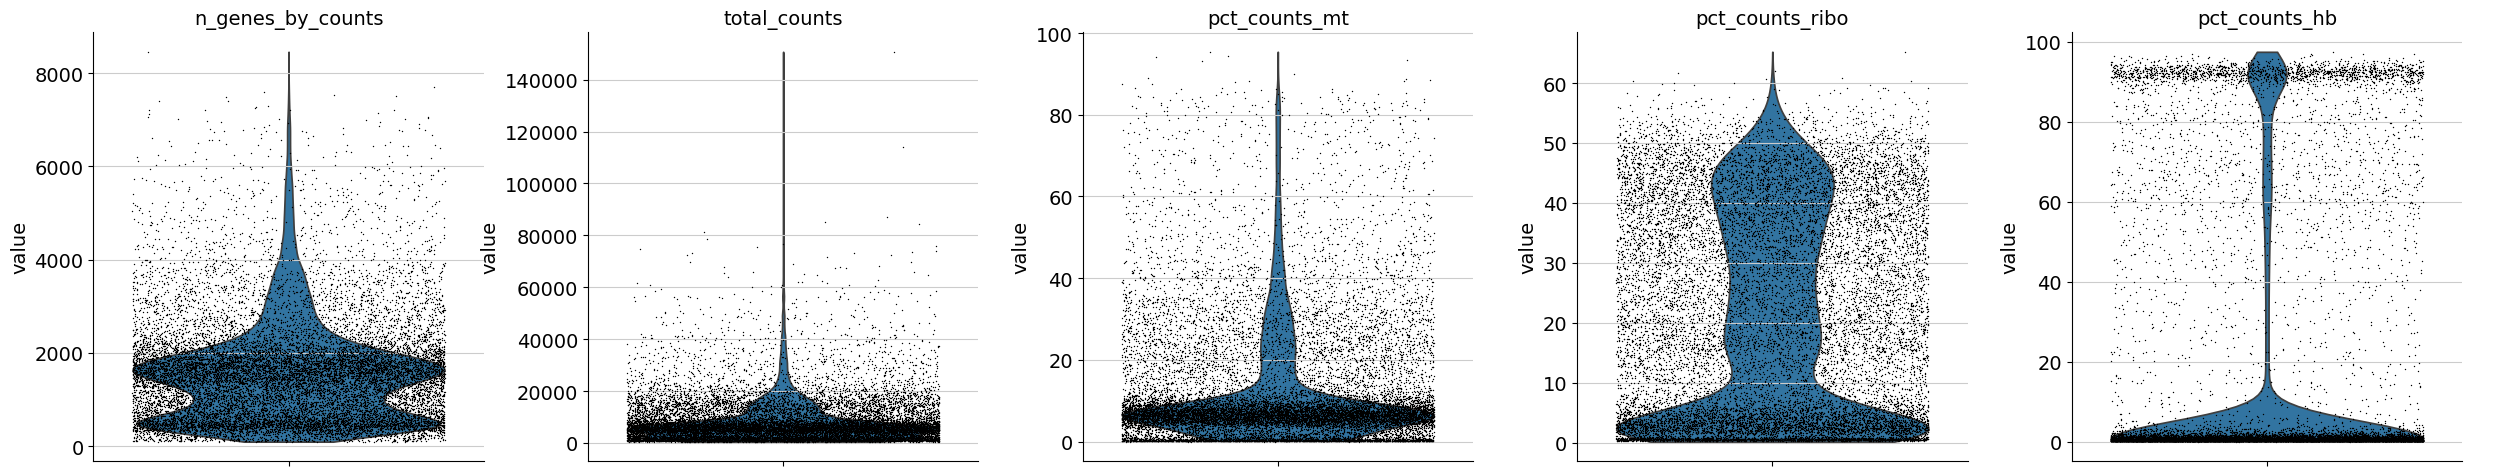

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt","pct_counts_ribo","pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
)

## Doublet detection

In [ ]:
sc.pp.scrublet(adata, batch_key="sample")

In [ ]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  ...  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGATGGCT-1            460.0  ...       5.309938             3650.0   
AAACCCAAGGCCTAGA-1           1790.0  ...      13.926710             1719.0   
AAACCCAAGTGAGTGC-1            581.0  ...      35.622318               63.0   
AAACCCACAAGAGGCT-1            780.0  ...       4.496973             3936.0   
AAACCCACATCGTGGC-1            159.0  ...      28.648647               26.0   
...                             ...  ...            ...                ...   
TTTGTTGAGAGTC

## Normalization

💾 Saving Raw Count Data

Before we normalize or transform the main matrix (`adata.X`), we save a copy of the raw counts in a separate layer.


In [ ]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [ ]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [ ]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  ...  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGATGGCT-1            460.0  ...       5.309938             3650.0   
AAACCCAAGGCCTAGA-1           1790.0  ...      13.926710             1719.0   
AAACCCAAGTGAGTGC-1            581.0  ...      35.622318               63.0   
AAACCCACAAGAGGCT-1            780.0  ...       4.496973             3936.0   
AAACCCACATCGTGGC-1            159.0  ...      28.648647               26.0   
...                             ...  ...            ...                ...   
TTTGTTGAGAGTC

## Feature selection

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

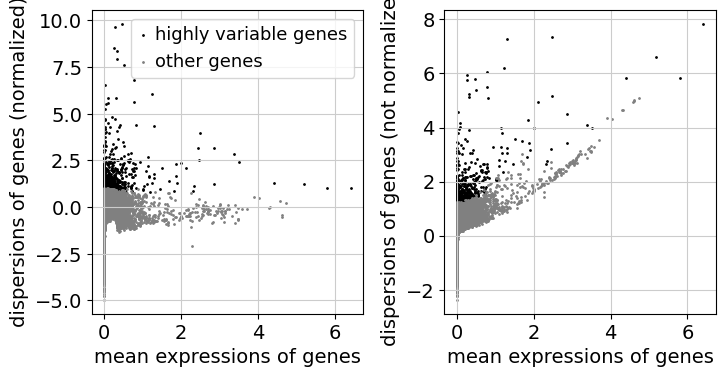

In [ ]:
sc.pl.highly_variable_genes(adata)

## Dimensionality Reduction

In [ ]:
sc.tl.pca(adata)

In [ ]:
# sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

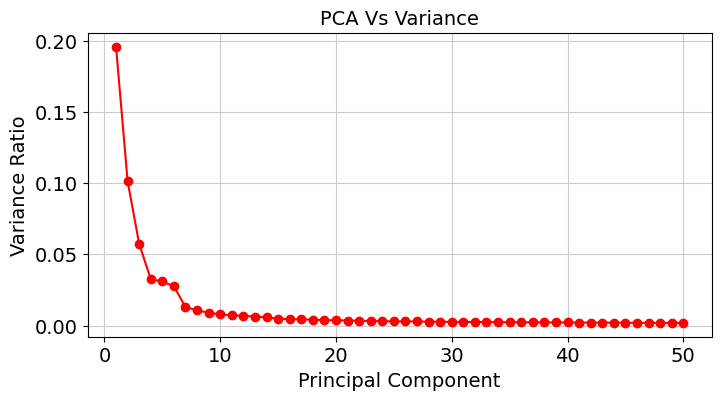

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the explained variance ratio (first 50 PCs)
variance_ratio = adata.uns['pca']['variance_ratio'][:50]

# Line plot with dots and connecting lines (no log transformation)
plt.figure(figsize=(8, 4))
plt.plot(range(1, 51), variance_ratio, marker='o', linestyle='-', color='r')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('PCA Vs Variance')
plt.grid(True)
plt.show()

You can also plot the principal components to see if there are any potentially undesired features (e.g. batch, QC metrics) driving signifigant variation in this dataset. In this case, there isn’t anything too alarming, but it’s a good idea to explore this.

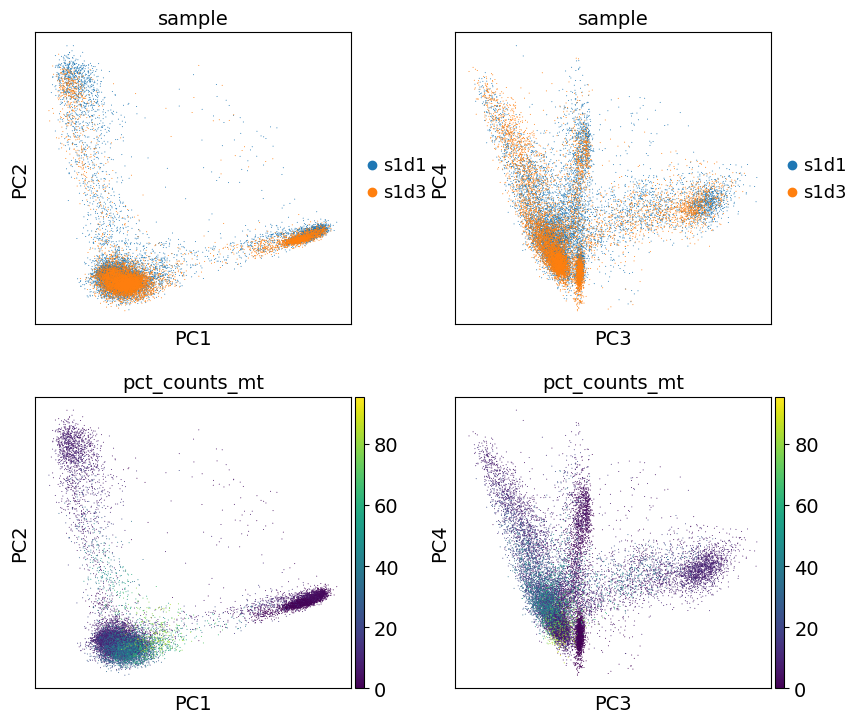

In [ ]:
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [ ]:
adata.obsp

PairwiseArrays with keys: 

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
adata.obsp

PairwiseArrays with keys: distances, connectivities

In [ ]:
sc.tl.umap(adata,)

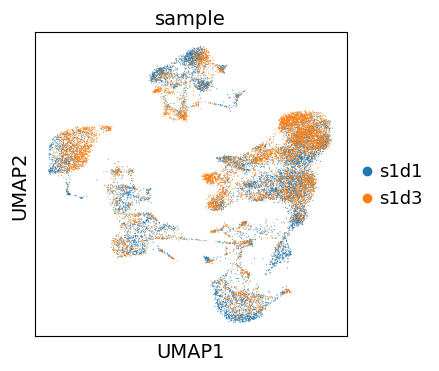

In [ ]:
import scanpy as sc

# Plot 3D UMAP with smaller points to prevent overlap
sc.pl.umap(
    adata,
    color="sample",   # Color points based on the "sample" column in adata.obs
    size=2,       # Set to 3D projection
)


Even though the data considered includes two different samples, we only observe a minor batch effect and we can continue with clustering and annotation of our data.

If you inspect batch effects in your UMAP, it can be beneficial to integrate across samples and perform batch correction/integration. We recommend checking out Scanorama and scvi-tools for batch integration.


## Clustering

In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=50)

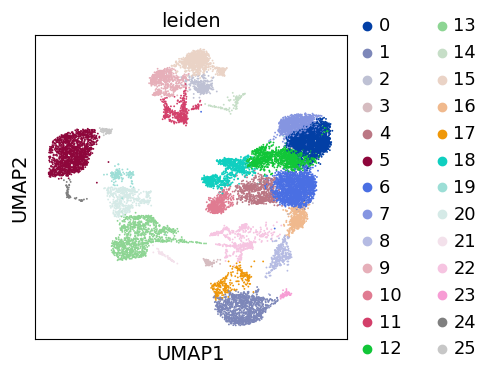

In [ ]:
sc.pl.umap(adata, color=["leiden"])

## Re-assess quality control and cell filtering

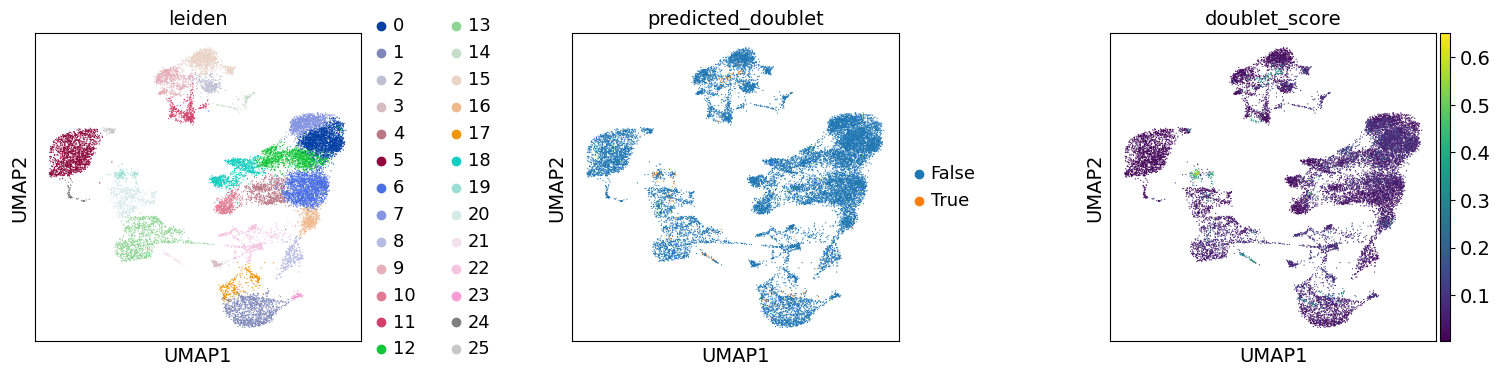

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

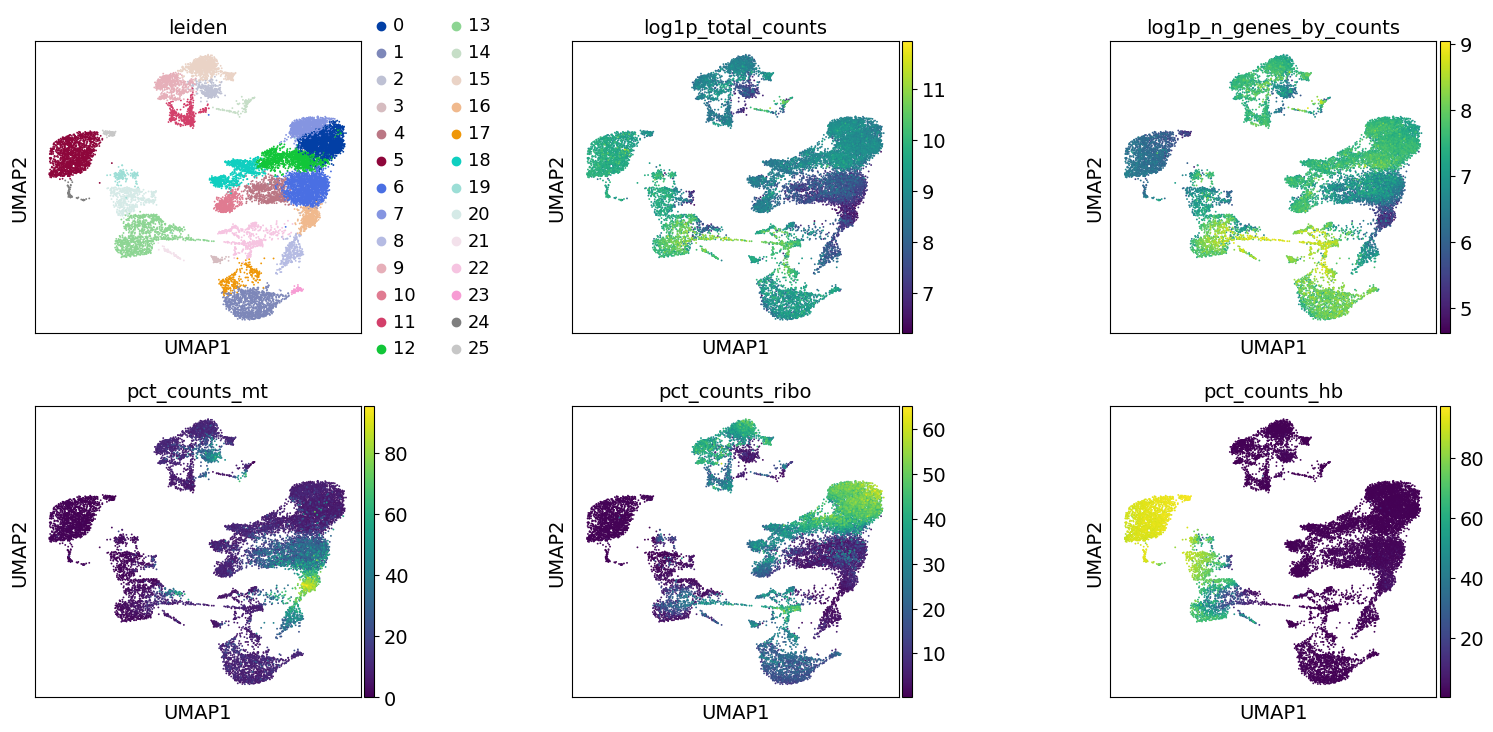

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "log1p_n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo" ,"pct_counts_hb"],
    wspace=0.5,
    ncols=3,
)

## Manual cell-type annotation

In [ ]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

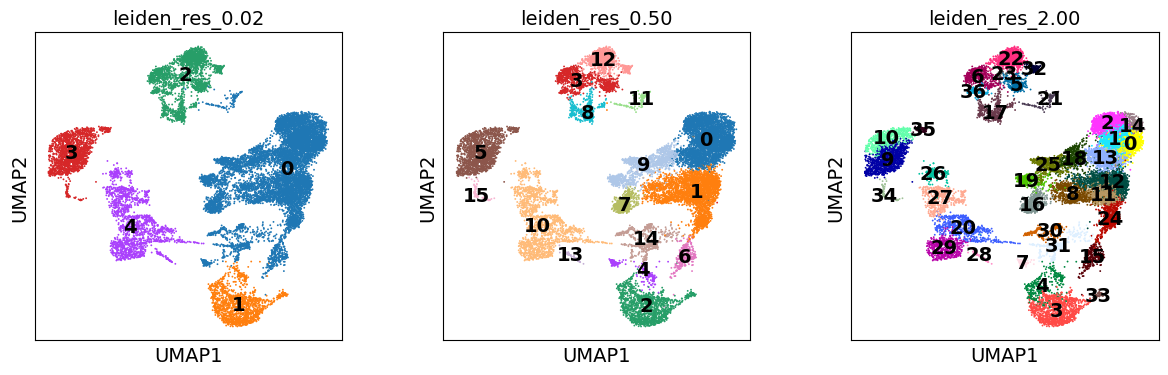

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

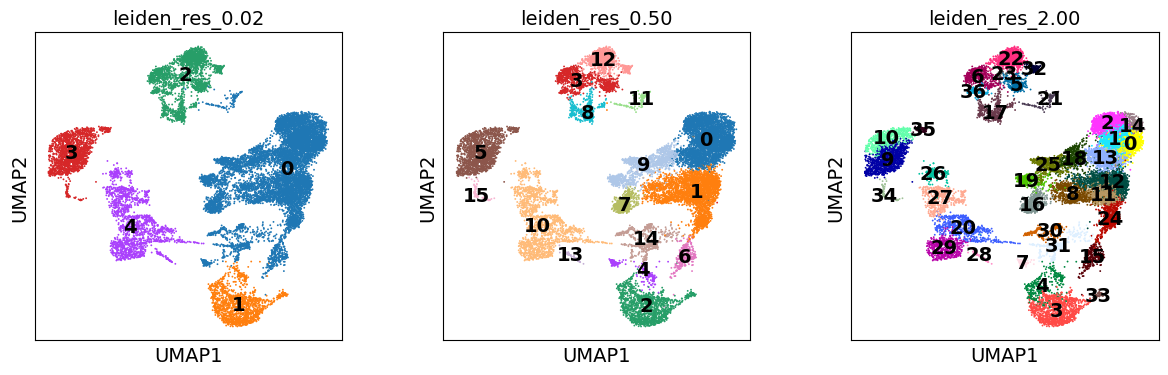

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

## Marker gene set

In [ ]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

📊 Dot Plot: What Dot Size and Color Represent

| **Component** | **Represents**                                | **Description**                                                                 |
|---------------|-----------------------------------------------|---------------------------------------------------------------------------------|
| **Dot Size**  | % of cells expressing the gene                | The fraction of cells (in a group or cluster) with **non-zero expression** of the gene. Larger dots mean **more cells express** the gene. |
| **Dot Color** | Average expression level (e.g., log-normalized) | The **average expression** of the gene **among expressing cells**. Darker color means **higher expression levels**. |

---

Summary

- **Dot Size** → _"How many cells express this gene?"_
- **Dot Color** → _"How strongly is the gene expressed (on average)?"_


📊 Dot Plot Interpretation in Single-Cell RNA-seq

| **Dot Size**  | **Dot Color (Intensity)**     | **Biological Interpretation**                        |
|---------------|-------------------------------|------------------------------------------------------|
| Small + Pale  | Low average expression        | **Low expression in few cells** – likely noise or non-marker |
| Large + Pale  | Low average expression        | **Low expression in many cells** – possibly a background or housekeeping gene |
| Small + Dark  | High average expression       | **High expression in few cells** – specific expression, but limited to a rare subpopulation |
| Large + Dark  | High average expression       | **High expression in many cells** – strong and widespread marker, ideal for defining a cell type |


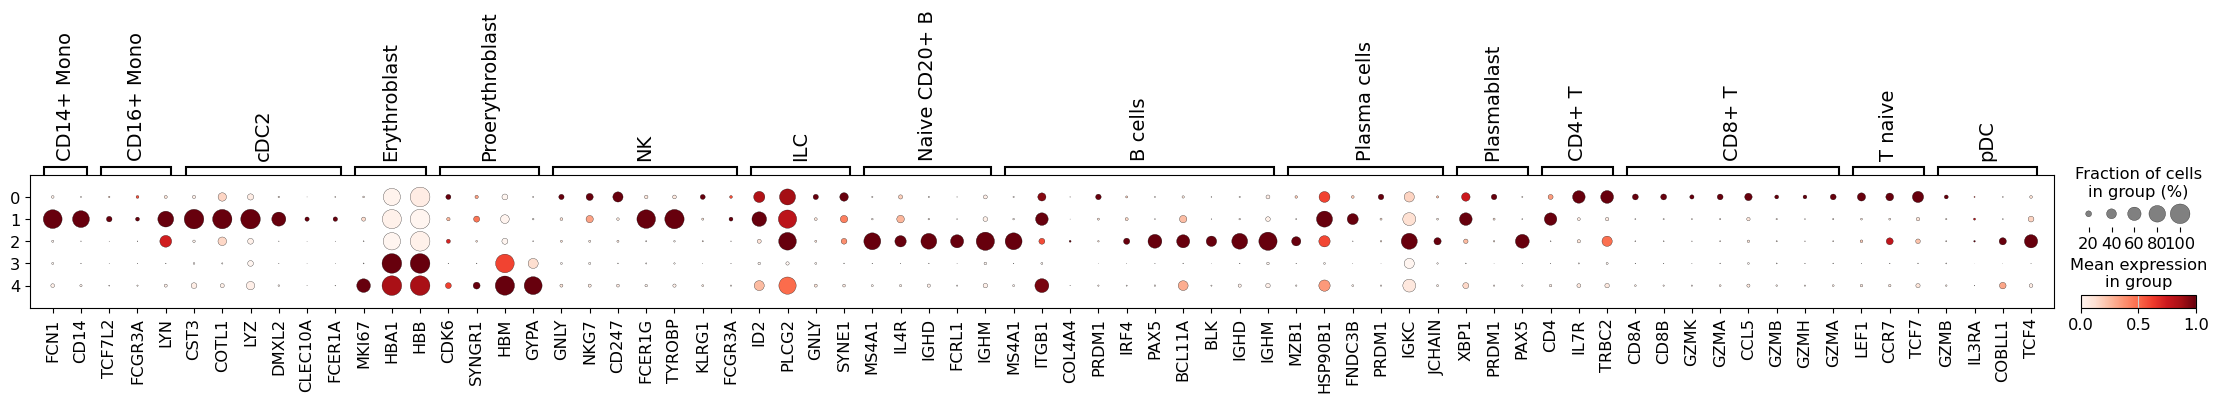

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var")

In [ ]:
adata.obs["cell_type_lvl1"] = adata.obs["leiden_res_0.02"].map(
    {
        "0": "Lymphocytes",
        "1": "Monocytes",
        "2": "Erythroid",
        "3": "B Cells",
        "4": "Erythroid (Pro+Erythroblast)",
    }
)

In [ ]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  ...  log1p_total_counts_hb  \
AAACCCAAGGATGGCT-1            460.0  ...               2.890372   
AAACCCAAGGCCTAGA-1           1790.0  ...               4.077538   
AAACCCAAGTGAGTGC-1            581.0  ...               2.639057   
AAACCCACAAGAGGCT-1            780.0  ...               3.806663   
AAACCCACATCGTGGC-1            159.0  ...               3.295837   
...                             ...  ...                    ...   
TTTGTTGAGAGTCTGG-1            282.0  ...               3.044523   
TTTGTTGCAGACAATA-1     

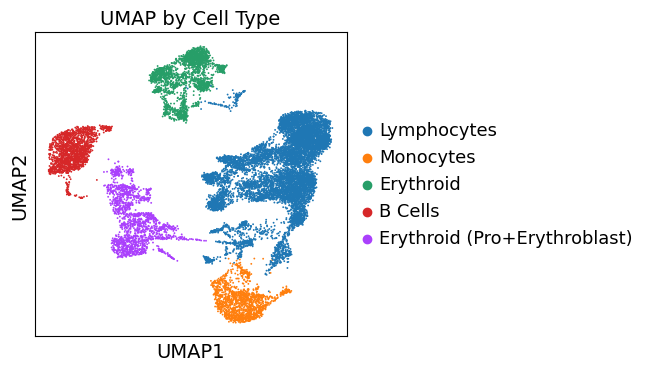

In [ ]:
sc.pl.umap(adata, color='cell_type_lvl1', title='UMAP by Cell Type')

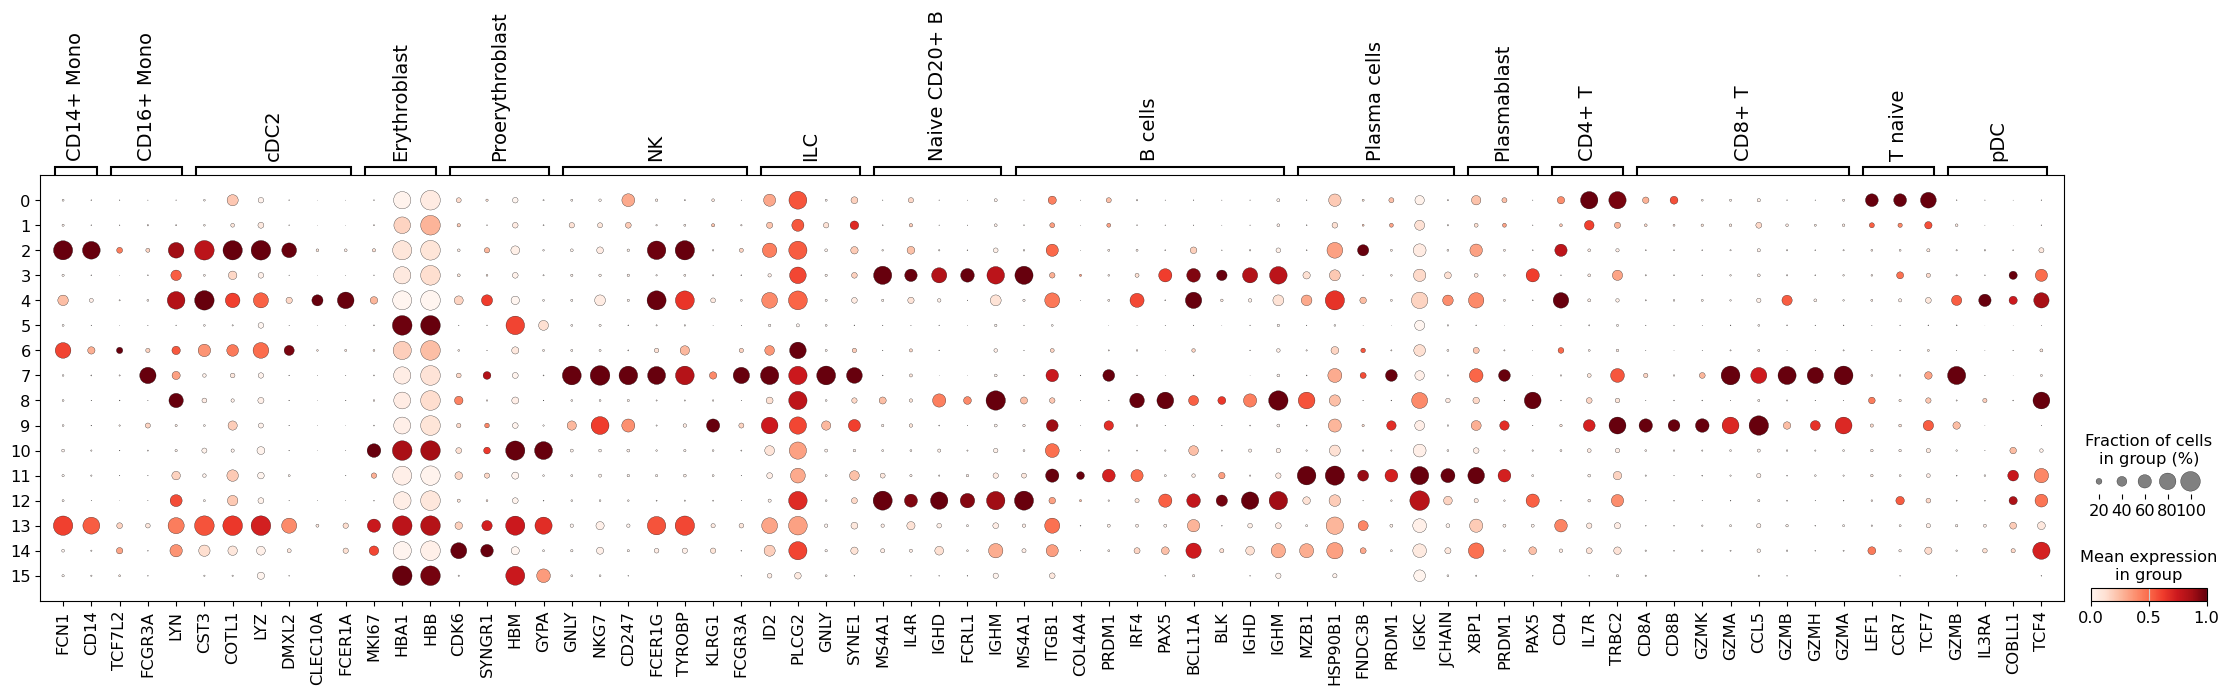

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.50", standard_scale="var")

 ## Differentially-expressed Genes as Markers

In [ ]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")

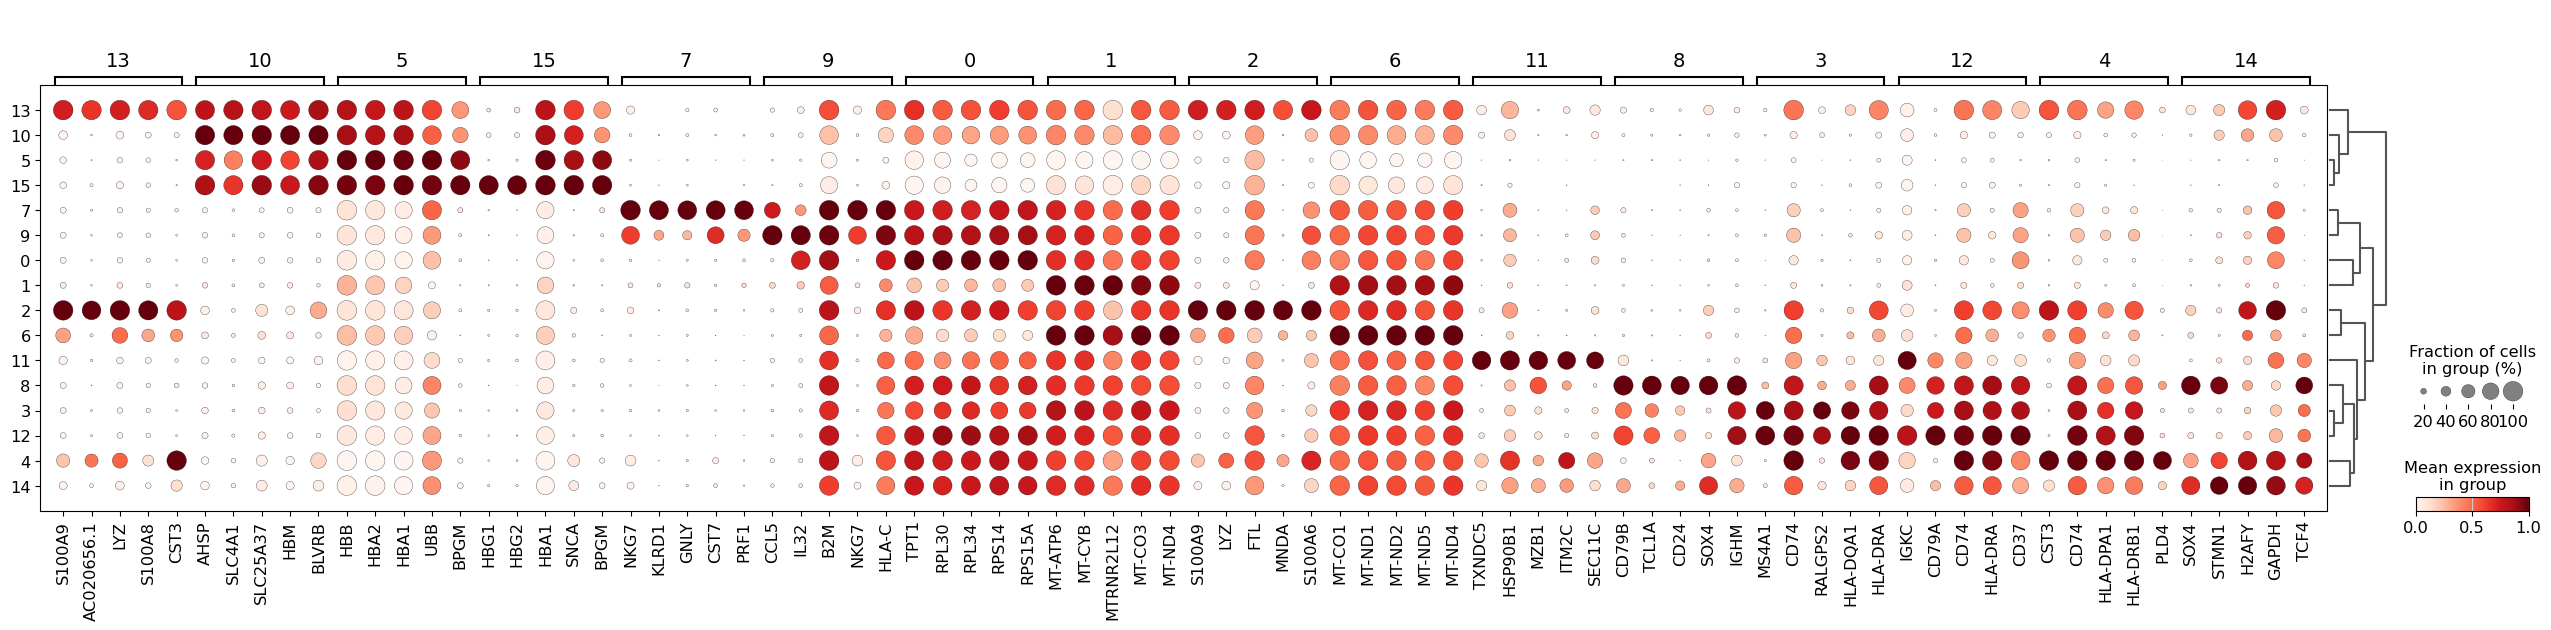

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5
)

In [ ]:
sc.get.rank_genes_groups_df(adata, group="1").head(5)

names     scores  logfoldchanges  pvals  pvals_adj
0    MT-ATP6  78.248444        2.824199    0.0        0.0
1     MT-CYB  77.706261        2.803914    0.0        0.0
2  MTRNR2L12  76.952309        2.820733    0.0        0.0
3     MT-CO3  76.055557        2.593261    0.0        0.0
4     MT-ND4  75.513496        2.510754    0.0        0.0

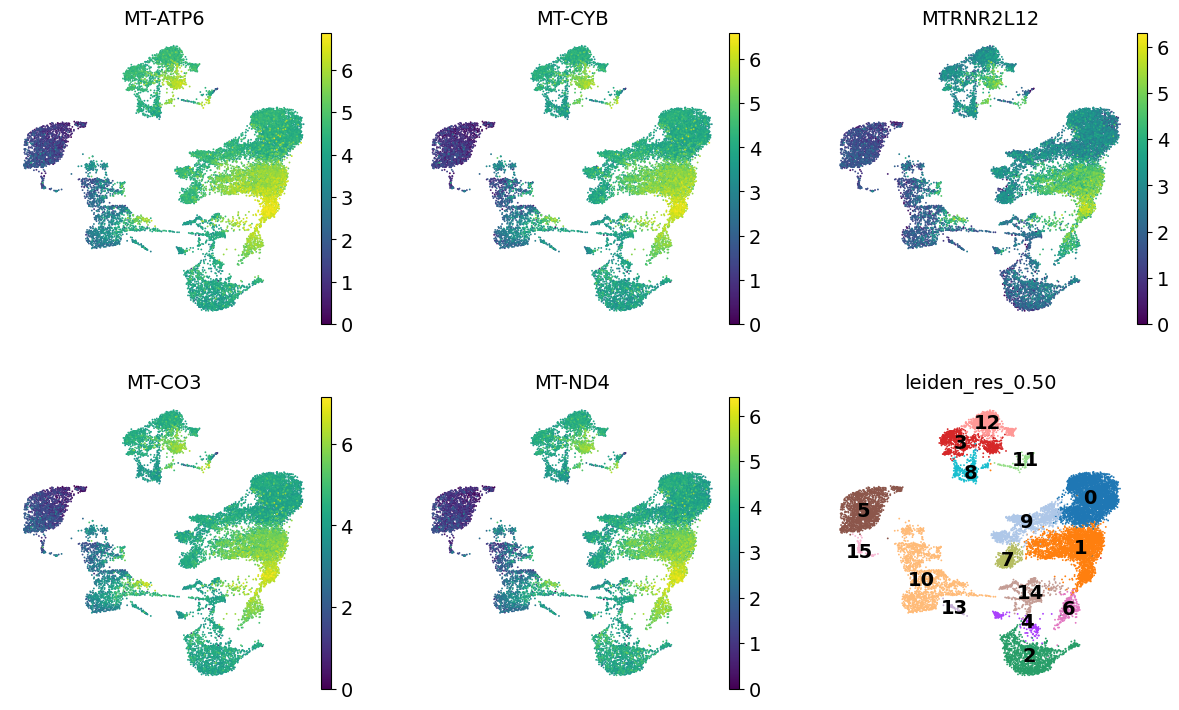

In [ ]:
dc_cluster_genes = sc.get.rank_genes_groups_df(adata, group="1").head(5)["names"]
sc.pl.umap(
    adata,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)